In [948]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn import feature_selection

In [949]:
df_spotify_original = pd.read_csv('datasets/spotify-2023.csv', index_col=0, encoding='ISO-8859-1')

In [950]:
df_spotify_original.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


In [951]:
df_spotify_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode     

In [952]:
df_spotify_original.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [953]:
df_spotify_original.describe(include=['object'])

,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts,key,mode
count,953,953,953,903,858,953
unique,645,949,348,198,11,2
top,Taylor Swift,723894473,0,0,C#,Major
freq,34,2,24,344,120,550


In [954]:
df_spotify_original.isnull().mean() * 100

artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

In [955]:
df_spotify = df_spotify_original.copy()

In [956]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode     

In [957]:
def impute_keys_with_null_values(df):
    mode = df['key'].mode()[0]
    df['key'].fillna(mode, inplace=True)
    return df
impute_keys_with_null_values(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,...,144,A,Major,60,24,39,57,0,8,3
Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,...,166,F#,Major,42,7,24,83,1,12,6
A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,...,92,C#,Major,80,81,67,4,0,8,6


In [958]:
def remove_commas(df, column_name):
    df[column_name] = df[column_name].str.replace(',', '')
    return df
df_spotify = remove_commas(df_spotify, 'in_deezer_playlists')

In [959]:
def convert_int64_to_float64(df):
    df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
    df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
    df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
    for col in df.columns:
        if df[col].dtype == 'int64' and col != 'released_year' and col != 'released_month' and col != 'released_day':
            df[col] = df[col].astype('float64')
    return df
convert_int64_to_float64(df_spotify)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0


In [960]:
def impute_missing_values(df):
    mean = df['in_shazam_charts'].mean().round()
    df['in_shazam_charts'] = df['in_shazam_charts'].fillna(mean)
    return df
df_spotify = impute_missing_values(df_spotify)


In [961]:
def remove_stream_with_null_values(df):
    df.dropna(subset=['streams'], inplace=True)
    return df
remove_stream_with_null_values(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0


In [962]:
df_spotify.isnull().mean() * 100

artist(s)_name          0.0
artist_count            0.0
released_year           0.0
released_month          0.0
released_day            0.0
in_spotify_playlists    0.0
in_spotify_charts       0.0
streams                 0.0
in_apple_playlists      0.0
in_apple_charts         0.0
in_deezer_playlists     0.0
in_deezer_charts        0.0
in_shazam_charts        0.0
bpm                     0.0
key                     0.0
mode                    0.0
danceability_%          0.0
valence_%               0.0
energy_%                0.0
acousticness_%          0.0
instrumentalness_%      0.0
liveness_%              0.0
speechiness_%           0.0
dtype: float64

In [963]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist(s)_name        952 non-null    object 
 1   artist_count          952 non-null    float64
 2   released_year         952 non-null    int64  
 3   released_month        952 non-null    int64  
 4   released_day          952 non-null    int64  
 5   in_spotify_playlists  952 non-null    float64
 6   in_spotify_charts     952 non-null    float64
 7   streams               952 non-null    float64
 8   in_apple_playlists    952 non-null    float64
 9   in_apple_charts       952 non-null    float64
 10  in_deezer_playlists   952 non-null    float64
 11  in_deezer_charts      952 non-null    float64
 12  in_shazam_charts      952 non-null    float64
 13  bpm                   952 non-null    float64
 14  key                   952 non-null    objec

In [964]:
x = df_spotify.copy()

In [965]:
percentage_features = ['danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'valence_%']
date_features = ['released_year', 'released_month', 'released_day']
def scale_features(df, percentage_features):
    for col in percentage_features:
        df[col] = df[col] / 100.0
    return df
scale_features(df_spotify, percentage_features)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,0.60,0.24,0.39,0.57,0.00,0.08,0.03
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,0.42,0.07,0.24,0.83,0.01,0.12,0.06
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,0.80,0.81,0.67,0.04,0.00,0.08,0.06


In [966]:
def standardize(data: pd.Series) -> pd.Series:
    return (data - np.mean(data)) / np.std(data)

In [967]:
def normalize(data: pd.Series) -> pd.Series:
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [968]:
def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        if df[col].dtype == 'float64' and col != 'artist_count' and col not in percentage_features and col not in date_features:
            df[col + ' Z'] = standardize(df[col])
    return df
standardize_columns(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,speechiness_%,in_spotify_playlists Z,in_spotify_charts Z,streams Z,in_apple_playlists Z,in_apple_charts Z,in_deezer_playlists Z,in_deezer_charts Z,in_shazam_charts Z,bpm Z
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,0.04,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,6.317955,0.087202
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,0.04,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,2.697352,-1.089065
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,0.06,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,7.320959,0.550580
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,0.15,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,4.051001,1.691202
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,0.06,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,3.047996,0.764446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,0.03,-0.538107,-0.614244,-0.746019,-0.079451,-0.769990,-0.308306,-0.276574,-0.417670,0.764446
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,0.06,-0.509363,-0.614244,-0.692365,-0.738981,-1.026896,-0.333959,-0.442275,-0.417670,1.548624
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,0.06,-0.586225,-0.614244,-0.777719,-0.762123,-1.026896,-0.334844,-0.442275,-0.417670,-1.089065


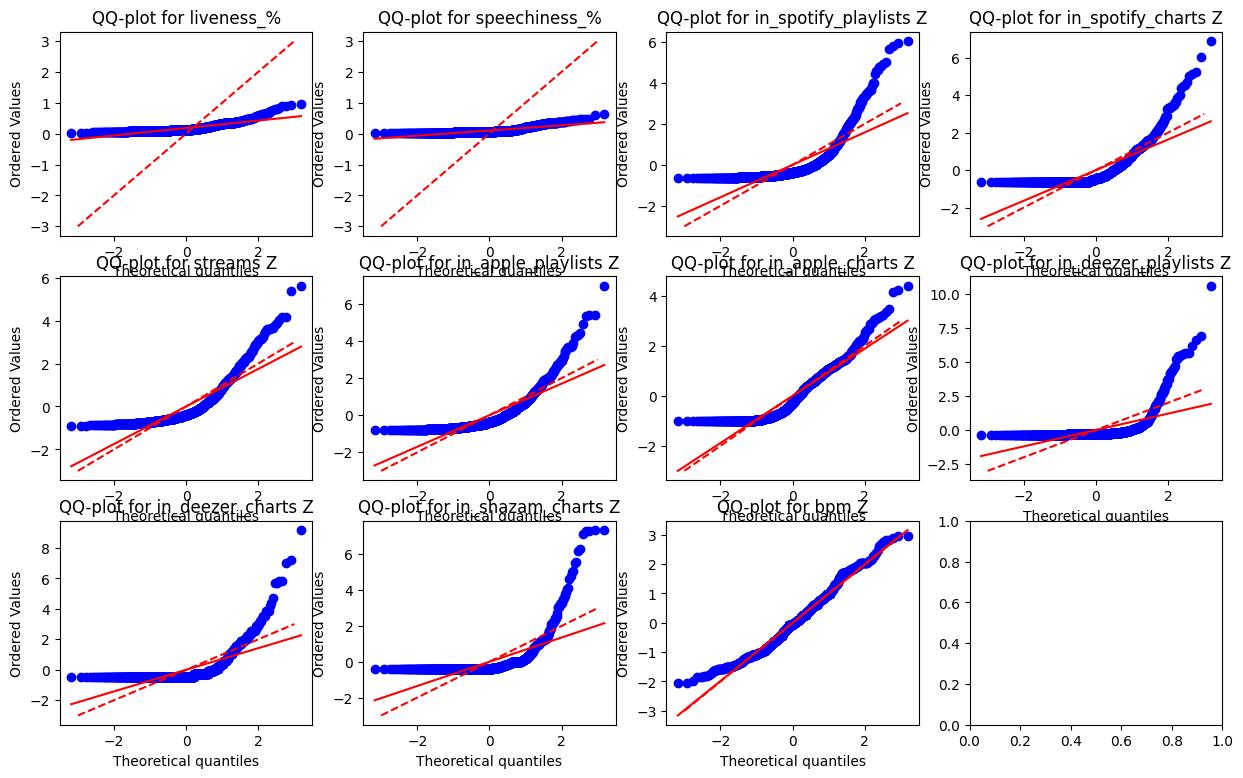

In [969]:
def qq_plot(df: pd.DataFrame):
    col_names = df.columns[21:]
    num_plots = len(col_names)
    
    # Calculate the number of rows and columns for the grid
    num_rows = math.ceil(num_plots / 4)
    grid_cols = min(num_plots, 4)
    
    fig, axs = plt.subplots(num_rows, grid_cols, figsize=(15, num_rows*3))
    axs = axs.ravel()  # Flatten the array of axes to make it easier to iterate over
    
    for i, col in enumerate(col_names):
        stats.probplot(df[col], plot=axs[i])
        axs[i].set_title('QQ-plot for ' + col)
        axs[i].plot([-3, 3], [-3, 3], color='r', linestyle='--')

qq_plot(df_spotify)

In [970]:
cols = ['bpm']
def normalize_cols(df: pd.DataFrame, cols: list):
    col_names = df.columns[:21]
    for col in col_names:
        if (col not in cols) and col != 'artist_count' and col not in percentage_features and df[col].dtype == 'float64' and col not in date_features:
            df[col] = normalize(df[col])
    return df
normalize_cols(df_spotify, cols)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,speechiness_%,in_spotify_playlists Z,in_spotify_charts Z,streams Z,in_apple_playlists Z,in_apple_charts Z,in_deezer_playlists Z,in_deezer_charts Z,in_shazam_charts Z,bpm Z
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,0.009874,1.000000,0.038170,0.063988,0.956364,...,0.04,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,6.317955,0.087202
LALA,Myke Towers,1.0,2023,3,23,0.027295,0.326531,0.036101,0.071429,0.458182,...,0.04,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,2.697352,-1.089065
vampire,Olivia Rodrigo,1.0,2023,6,30,0.025838,0.768707,0.037798,0.139881,0.752727,...,0.06,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,7.320959,0.550580
Cruel Summer,Taylor Swift,1.0,2019,8,23,0.148051,0.680272,0.216215,0.172619,0.752727,...,0.15,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,4.051001,1.691202
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,0.058676,0.340136,0.081869,0.125000,0.483636,...,0.06,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,3.047996,0.764446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,0.017440,0.000000,0.024696,0.090774,0.047273,...,0.03,-0.538107,-0.614244,-0.746019,-0.079451,-0.769990,-0.308306,-0.276574,-0.417670,0.764446
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,0.021734,0.000000,0.032903,0.005952,0.000000,...,0.06,-0.509363,-0.614244,-0.692365,-0.738981,-1.026896,-0.333959,-0.442275,-0.417670,1.548624
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,0.010252,0.000000,0.019847,0.002976,0.000000,...,0.06,-0.586225,-0.614244,-0.777719,-0.762123,-1.026896,-0.334844,-0.442275,-0.417670,-1.089065


In [971]:
def standardize_cols(df: pd.DataFrame, cols: list):
    col_names = df.columns[:21]
    col_names_z = df.columns[21:]
    for col in col_names:
        if (col in cols) and col != 'artist_count' and col not in percentage_features and df[col].dtype == 'float64' and col not in date_features:
            df[col] = standardize(df[col])
    for col in col_names_z:
        df.drop(col, axis=1, inplace=True)   
    return df
standardize_cols(df_spotify, cols)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,0.009874,1.000000,0.038170,0.063988,0.956364,...,0.172414,0.866737,0.087202,B,Major,0.80,0.89,0.83,0.31,0.00
LALA,Myke Towers,1.0,2023,3,23,0.027295,0.326531,0.036101,0.071429,0.458182,...,0.241379,0.400839,-1.089065,C#,Major,0.71,0.61,0.74,0.07,0.00
vampire,Olivia Rodrigo,1.0,2023,6,30,0.025838,0.768707,0.037798,0.139881,0.752727,...,0.241379,0.995803,0.550580,F,Major,0.51,0.32,0.53,0.17,0.00
Cruel Summer,Taylor Swift,1.0,2019,8,23,0.148051,0.680272,0.216215,0.172619,0.752727,...,0.206897,0.575026,1.691202,A,Major,0.55,0.58,0.72,0.11,0.00
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,0.058676,0.340136,0.081869,0.125000,0.483636,...,0.258621,0.445960,0.764446,A,Minor,0.65,0.23,0.80,0.14,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,0.017440,0.000000,0.024696,0.090774,0.047273,...,0.017241,0.000000,0.764446,A,Major,0.60,0.24,0.39,0.57,0.00
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,0.021734,0.000000,0.032903,0.005952,0.000000,...,0.000000,0.000000,1.548624,F#,Major,0.42,0.07,0.24,0.83,0.01
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,0.010252,0.000000,0.019847,0.002976,0.000000,...,0.000000,0.000000,-1.089065,C#,Major,0.80,0.81,0.67,0.04,0.00


In [972]:
def label_encode_features(df):
    encoder = LabelEncoder()
    df['key'] = encoder.fit_transform(df['key'])
    df['mode'] = encoder.fit_transform(df['mode'])
    df['artist(s)_name'] = encoder.fit_transform(df['artist(s)_name'])
    return df
df_spotify = label_encode_features(df_spotify)

In [973]:

def low_variance_removal(df, threshold, target_variable):
    # Create a VarianceThreshold feature selector

    df = df.drop(target_variable, axis=1)

    selector = feature_selection.VarianceThreshold(threshold)

    # Fit and transform the selector on our data
    variance_filtered = selector.fit_transform(df)

    df = pd.DataFrame(variance_filtered, columns=df.columns[selector.get_support()])

    print('Features with variance > {}:\n'.format(threshold), df.columns.tolist())

    return df
feature_selection = low_variance_removal(df_spotify, 0.8, 'mode')
feature_selection

Features with variance > 0.8:
 ['artist(s)_name', 'released_year', 'released_month', 'released_day', 'bpm', 'key']


,artist(s)_name,released_year,released_month,released_day,bpm,key
0,325.0,2023.0,7.0,14.0,0.087202,2.0
1,400.0,2023.0,3.0,23.0,-1.089065,3.0
2,430.0,2023.0,6.0,30.0,0.550580,7.0
3,557.0,2019.0,8.0,23.0,1.691202,0.0
4,43.0,2023.0,5.0,18.0,0.764446,0.0
...,...,...,...,...,...,...
947,516.0,2022.0,11.0,3.0,0.764446,0.0
948,557.0,2022.0,10.0,21.0,1.548624,8.0
949,183.0,2022.0,11.0,3.0,-1.089065,3.0
950,184.0,2022.0,10.0,20.0,-0.910843,3.0


In [974]:
def apply_KMeans(df):
    avg_silhouette = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(df)
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(df, cluster_labels)
        print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
        avg_silhouette.append(silhouette_avg)
        wcss.append(kmeans.inertia_)
    return df, avg_silhouette
df_spotify_kmeans, avg_silhouette = apply_KMeans(feature_selection)
df_spotify_kmeans

For n_clusters = 2 The average silhouette_score is : 0.6290260532744626
For n_clusters = 3 The average silhouette_score is : 0.5778342129462046
For n_clusters = 4 The average silhouette_score is : 0.5430987665070507
For n_clusters = 5 The average silhouette_score is : 0.5362942923125914
For n_clusters = 6 The average silhouette_score is : 0.5157503189231598
For n_clusters = 7 The average silhouette_score is : 0.5117562223790465
For n_clusters = 8 The average silhouette_score is : 0.4988713265352738
For n_clusters = 9 The average silhouette_score is : 0.47520779893313003
For n_clusters = 10 The average silhouette_score is : 0.46191657498111627


,artist(s)_name,released_year,released_month,released_day,bpm,key
0,325.0,2023.0,7.0,14.0,0.087202,2.0
1,400.0,2023.0,3.0,23.0,-1.089065,3.0
2,430.0,2023.0,6.0,30.0,0.550580,7.0
3,557.0,2019.0,8.0,23.0,1.691202,0.0
4,43.0,2023.0,5.0,18.0,0.764446,0.0
...,...,...,...,...,...,...
947,516.0,2022.0,11.0,3.0,0.764446,0.0
948,557.0,2022.0,10.0,21.0,1.548624,8.0
949,183.0,2022.0,11.0,3.0,-1.089065,3.0
950,184.0,2022.0,10.0,20.0,-0.910843,3.0


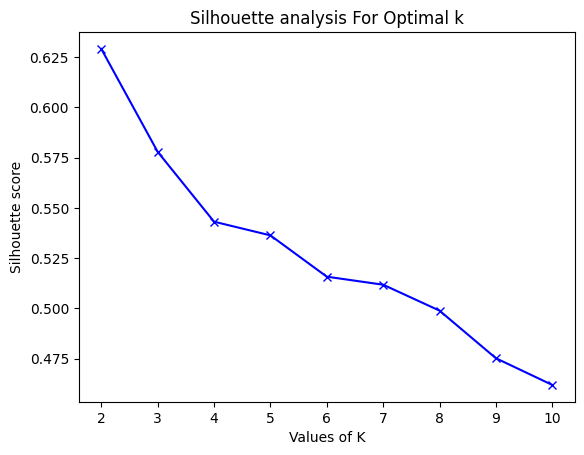

In [975]:
def plot_silhouette(avg_silhouette):
    plt.plot(range(2, 11),avg_silhouette, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette analysis For Optimal k')
    plt.show()
plot_silhouette(avg_silhouette)

In [976]:
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(feature_selection)
        wcss.append(kmeans.inertia_)    

Text(0, 0.5, 'WCSS')

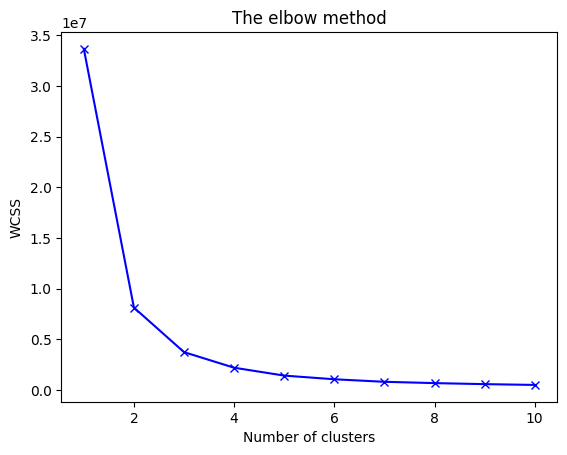

In [977]:
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

In [978]:
def apply_best_KMeans(df):
    kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(feature_selection)
    cluster_labels = kmeans.labels_
    return df, cluster_labels, kmeans
df_spotify_kmeans, cluster_labels, km = apply_best_KMeans(df_spotify_kmeans)

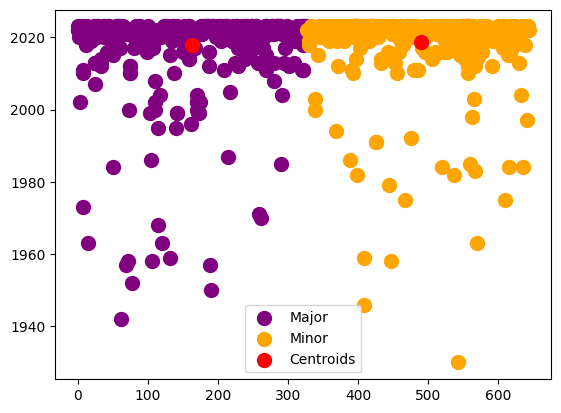

In [979]:
import matplotlib.pyplot as plt
plt.scatter(feature_selection.iloc[cluster_labels == 0, 0], feature_selection.iloc[cluster_labels == 0, 1], s = 100, c = 'purple', label = 'Major')
plt.scatter(feature_selection.iloc[cluster_labels == 1, 0], feature_selection.iloc[cluster_labels == 1, 1], s = 100, c = 'orange', label = 'Minor')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()


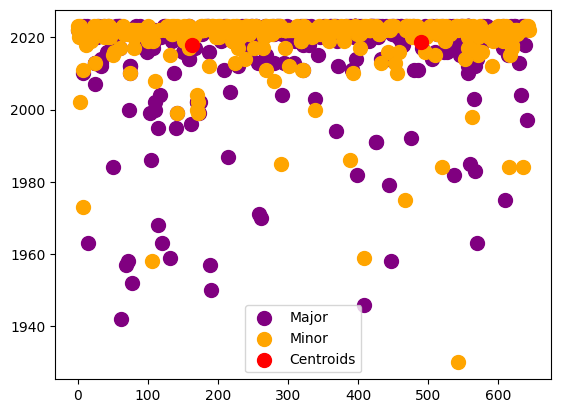

In [983]:
import matplotlib.pyplot as plt

major = df_spotify['mode'] == 0
minor = df_spotify['mode'] == 1

plt.scatter(feature_selection.iloc[major.values, 0], feature_selection.iloc[major.values, 1], s = 100, c = 'purple', label = 'Major')
plt.scatter(feature_selection.iloc[minor.values, 0], feature_selection.iloc[minor.values, 1], s = 100, c = 'orange', label = 'Minor')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()


In [554]:
def apply_pca(df, n_components):
    # Instantiate PCA with the specified number of components
    pca = PCA(n_components=n_components)
    
    # Fit and transform the data using PCA
    transformed_data = pca.fit_transform(df)
    
    # Create a new dataframe with the transformed data
    transformed_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(n_components)])
    
    return transformed_df
df_spotify_pca = apply_pca(df_spotify_selected_without_streams, 2)

In [555]:
df_spotify_pca

,PC1,PC2
0,-0.096025,-0.014325
1,-0.078617,-0.013793
2,-0.040572,-0.067328
3,0.068953,-0.050461
4,-0.024728,-0.044519
...,...,...
947,-0.075772,-0.033363
948,-0.120712,0.034304
949,-0.130878,0.032729
950,-0.097769,0.006012


In [556]:
df_spotify_pca['streams'] = df_spotify_selected['streams'].reset_index(drop=True)
df_spotify_pca

,PC1,PC2,streams
0,-0.096025,-0.014325,0.038170
1,-0.078617,-0.013793,0.036101
2,-0.040572,-0.067328,0.037798
3,0.068953,-0.050461,0.216215
4,-0.024728,-0.044519,0.081869
...,...,...,...
947,-0.075772,-0.033363,0.024696
948,-0.120712,0.034304,0.032903
949,-0.130878,0.032729,0.019847
950,-0.097769,0.006012,0.036149


In [557]:
def apply_KMeans(df):
    avg_silhouette = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(df.drop("streams", axis=1))
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(df.drop("streams", axis=1), cluster_labels)
        print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
        avg_silhouette.append(silhouette_avg)
    return df, avg_silhouette
df_spotify_kmeans, avg_silhouette = apply_KMeans(df_spotify_pca)
df_spotify_kmeans

For n_clusters = 2 The average silhouette_score is : 0.7515751159738433
For n_clusters = 3 The average silhouette_score is : 0.6441300970726591
For n_clusters = 4 The average silhouette_score is : 0.6520291889105237
For n_clusters = 5 The average silhouette_score is : 0.6440342031375412
For n_clusters = 6 The average silhouette_score is : 0.5762800298366811
For n_clusters = 7 The average silhouette_score is : 0.5761771988232979
For n_clusters = 8 The average silhouette_score is : 0.5184220653898916
For n_clusters = 9 The average silhouette_score is : 0.5237079016162854
For n_clusters = 10 The average silhouette_score is : 0.5208769650683881


,PC1,PC2,streams
0,-0.096025,-0.014325,0.038170
1,-0.078617,-0.013793,0.036101
2,-0.040572,-0.067328,0.037798
3,0.068953,-0.050461,0.216215
4,-0.024728,-0.044519,0.081869
...,...,...,...
947,-0.075772,-0.033363,0.024696
948,-0.120712,0.034304,0.032903
949,-0.130878,0.032729,0.019847
950,-0.097769,0.006012,0.036149


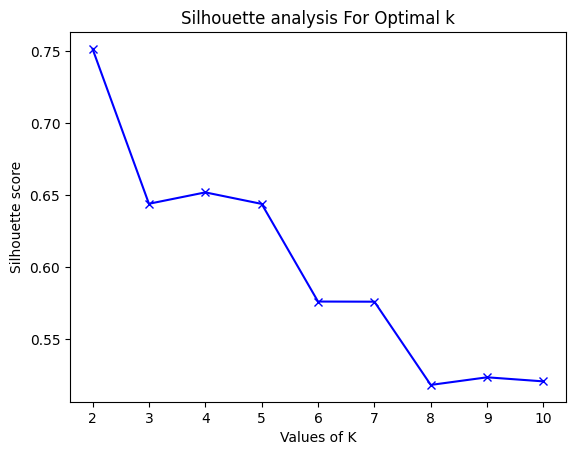

In [558]:
def plot_silhouette(avg_silhouette):
    plt.plot(range(2, 11),avg_silhouette, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette analysis For Optimal k')
    plt.show()
plot_silhouette(avg_silhouette)

In [559]:
def apply_best_KMeans(df):
    kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df.drop("streams", axis=1))
    cluster_labels = kmeans.labels_
    return df, cluster_labels
df_spotify_kmeans, cluster_labels = apply_best_KMeans(df_spotify_kmeans)



In [560]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

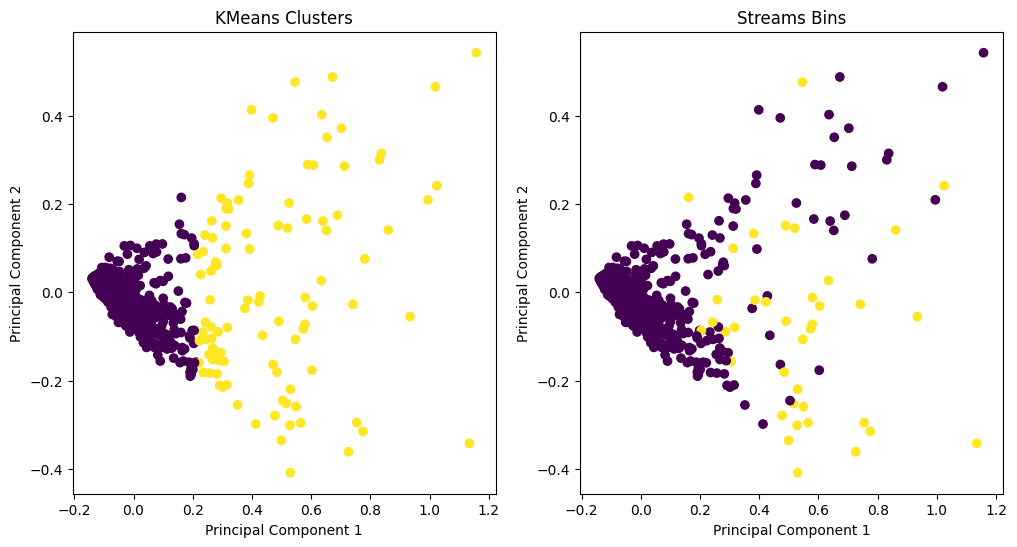

In [561]:
def plot_clusters_and_ground_truth(df, reduced_data, cluster_labels):
    # Create a new figure
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot for the KMeans clusters
    ax[0].scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=cluster_labels)
    ax[0].set_xlabel('Principal Component 1')
    ax[0].set_ylabel('Principal Component 2')
    ax[0].set_title('KMeans Clusters')

    # Bin 'streams' into 10 categories
    df['streams_bins'] = pd.cut(df['streams'], bins=2, labels=np.arange(2))

    # Scatter plot for the ground truth
    ax[1].scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=df['streams_bins'])
    ax[1].set_xlabel('Principal Component 1')
    ax[1].set_ylabel('Principal Component 2')
    ax[1].set_title('Streams Bins')

    # Show the plots
    plt.show()
    return df['streams_bins']

# Call the function
ground_truth = plot_clusters_and_ground_truth(df_spotify.copy(), df_spotify_pca, cluster_labels)


In [562]:
new_df = pd.DataFrame({'Streams': ground_truth, 'Cluster Number': cluster_labels})
x = new_df

In [563]:
def apply_KModes(df):
    avg_silhouette = []
    k = range(2, 11)
    for i in range(2, 11):
        kmodes = KModes(n_clusters = i, init = "Random", n_init = 5, verbose=1)
        clusters = kmodes.fit_predict(df.drop("streams", axis=1))
        silhouette_avg = silhouette_score(df.drop("streams", axis=1), clusters)
        print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
    return df, avg_silhouette
df_spotify_kmodes, avg_silhouette = apply_KModes(df_spotify_pca)
df_spotify_kmodes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1900.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1900.0
Best run was number 1
For n_clusters = 2 The average silhouette_score is : -0.43386913317067244
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1898.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1898.0
Init: in

,PC1,PC2,streams
0,-0.096025,-0.014325,0.038170
1,-0.078617,-0.013793,0.036101
2,-0.040572,-0.067328,0.037798
3,0.068953,-0.050461,0.216215
4,-0.024728,-0.044519,0.081869
...,...,...,...
947,-0.075772,-0.033363,0.024696
948,-0.120712,0.034304,0.032903
949,-0.130878,0.032729,0.019847
950,-0.097769,0.006012,0.036149


ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

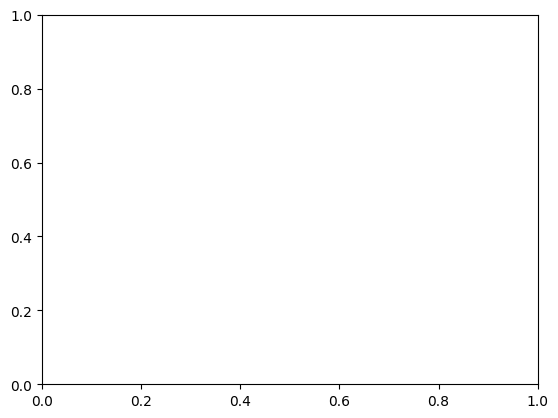

In [564]:
plot_silhouette(avg_silhouette)